### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 여러 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value): 해당 독립 변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미하다.
- Durbin-Watson: 보통 1.5에서 2.5사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sup>2</sup>값을 유지 또는 개선하는 방향으로만 수행해야 한다.


### VIF(Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src='./images/multicollinearity.png'>

### OLS (Ordinary Least Square) Task  

#### 서울 자전거 대여 수 분석

- Date: 대여 날짜
- Rented Bike Count: 대여 수
- Hour: 대여 시간
- Temperature(°C): 온도(섭씨)
- Humidity(%): 습도 (%)
- Wind speed (m/s): 풍속 (m/s)
- Visibility (10m): 가시거리 (10m)
- Dew point temperature(°C): 이슬점(°C), 이슬점이 낮으면 10~15°C 정도로 공기가 편안하게 느껴진다.
- Solar Radiation (MJ/m2): 태양복사 (MJ/m2)
- Rainfall(mm): 강우량/비 (mm)
- Snowfall (cm): 강우량/눈 (cm)
- Seasons: 계절
- Holiday: 공휴일
- Functioning Day: 운영 여부

### 파일을 읽어올 수 없는 경우
- <code>open('csv').read()</code>
- <code>import chardet</code>
- <code>chardet.detect(rawdata)</code>
> 위 과정을 통해 encoding을 확인하고 read_csv에 encoding=''을 넣어줘서 읽어온다.

In [13]:
import pandas as pd
import chardet

rawdata = open('./datasets/seoul_bicycle.csv', 'rb').read()
result = chardet.detect(rawdata)
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [14]:
b_df = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')
b_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 타겟 데이터가 자전거 대여 수 이기 때문에, 날짜별, 날씨별 기타 등등으로 데이터 탐색을 먼저 진행

In [15]:
groub_b_df = b_df[['Date','Rented Bike Count']].groupby('Date').sum('Rented Bike Count').reset_index()
groub_b_df

,Date,Rented Bike Count
0,01/01/2018,4290
1,01/02/2018,5377
2,01/03/2018,5132
3,01/04/2018,17388
4,01/05/2018,26820
...,...,...
360,31/05/2018,31681
361,31/07/2018,22897
362,31/08/2018,27817
363,31/10/2018,21545


In [16]:
groub_b_df['Date'] = pd.to_datetime(groub_b_df['Date'], dayfirst=True)
groub_b_df

,Date,Rented Bike Count
0,2018-01-01,4290
1,2018-02-01,5377
2,2018-03-01,5132
3,2018-04-01,17388
4,2018-05-01,26820
...,...,...
360,2018-05-31,31681
361,2018-07-31,22897
362,2018-08-31,27817
363,2018-10-31,21545


In [17]:
groub_b_df.duplicated().sum()

0

### 날짜별 시각화

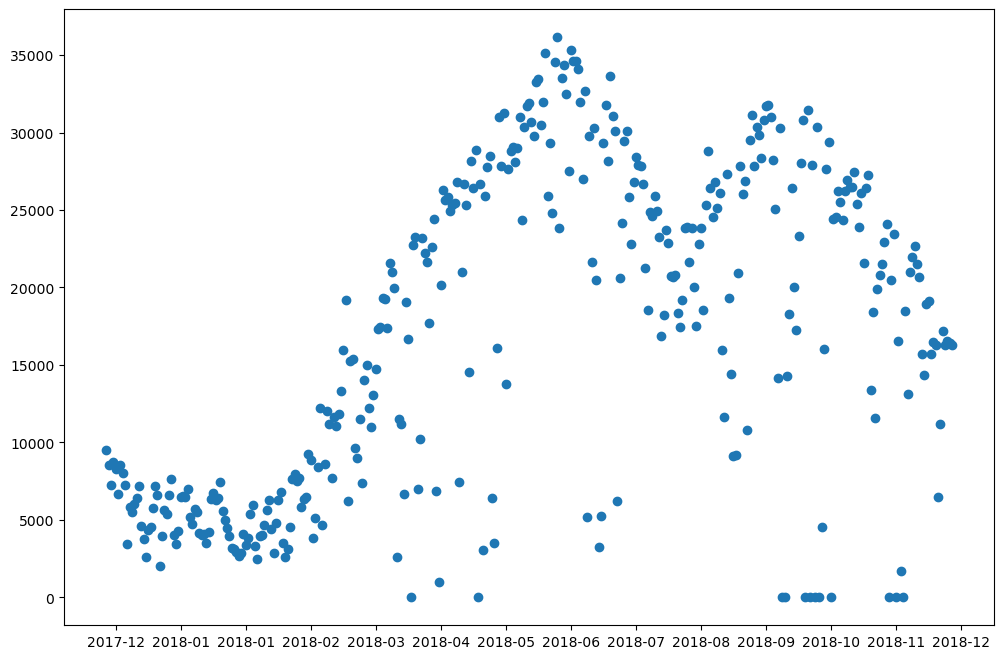

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 8))

date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(date_format)
plt.scatter(groub_b_df.Date, groub_b_df['Rented Bike Count'])
plt.show()

### 타겟 데이터 분포 확인

In [19]:
pre_b_df = b_df.copy()

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

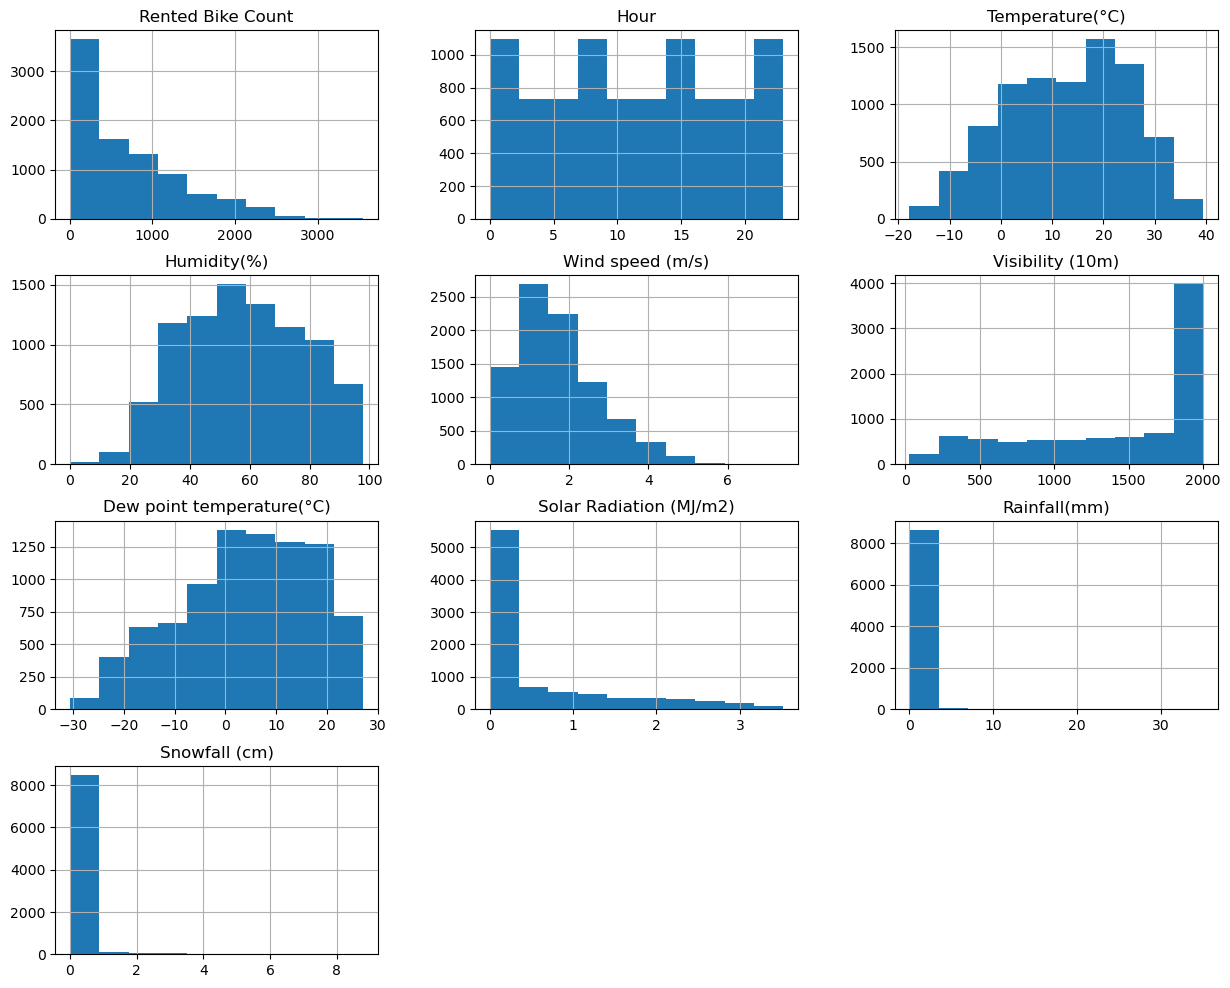

In [20]:
pre_b_df.hist(figsize=(15,12))

### 타겟 데이터 분포 정규모양에 맞게 바꿔주기

<Axes: >

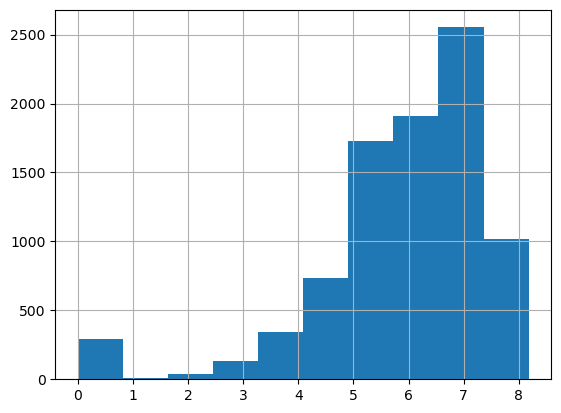

In [21]:
import numpy as np

np.log1p(pre_b_df['Rented Bike Count']).hist()

- 로그변환 후 확인 했을 때, 0인 값들이 확인됨.
- 이 값들은 제거

<Axes: >

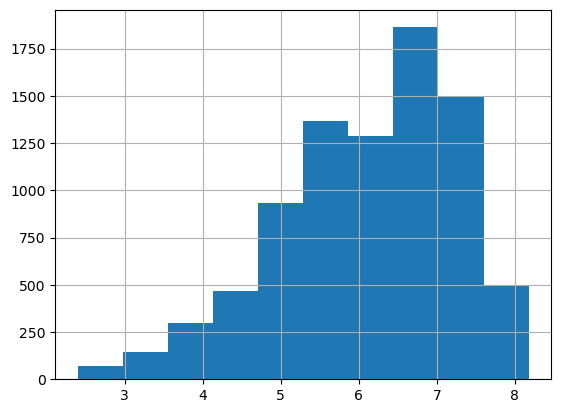

In [22]:
np.log1p(pre_b_df[pre_b_df['Rented Bike Count'] >= 10]['Rented Bike Count']).hist()

확인후 적용

In [23]:
pre_b_df = pre_b_df[pre_b_df['Rented Bike Count'] >= 10].reset_index(drop=True)
pre_b_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8422,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8423,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8424,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [24]:
pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])
pre_b_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,30/11/2018,6.911747,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8422,30/11/2018,6.639876,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8423,30/11/2018,6.543912,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8424,30/11/2018,6.569481,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

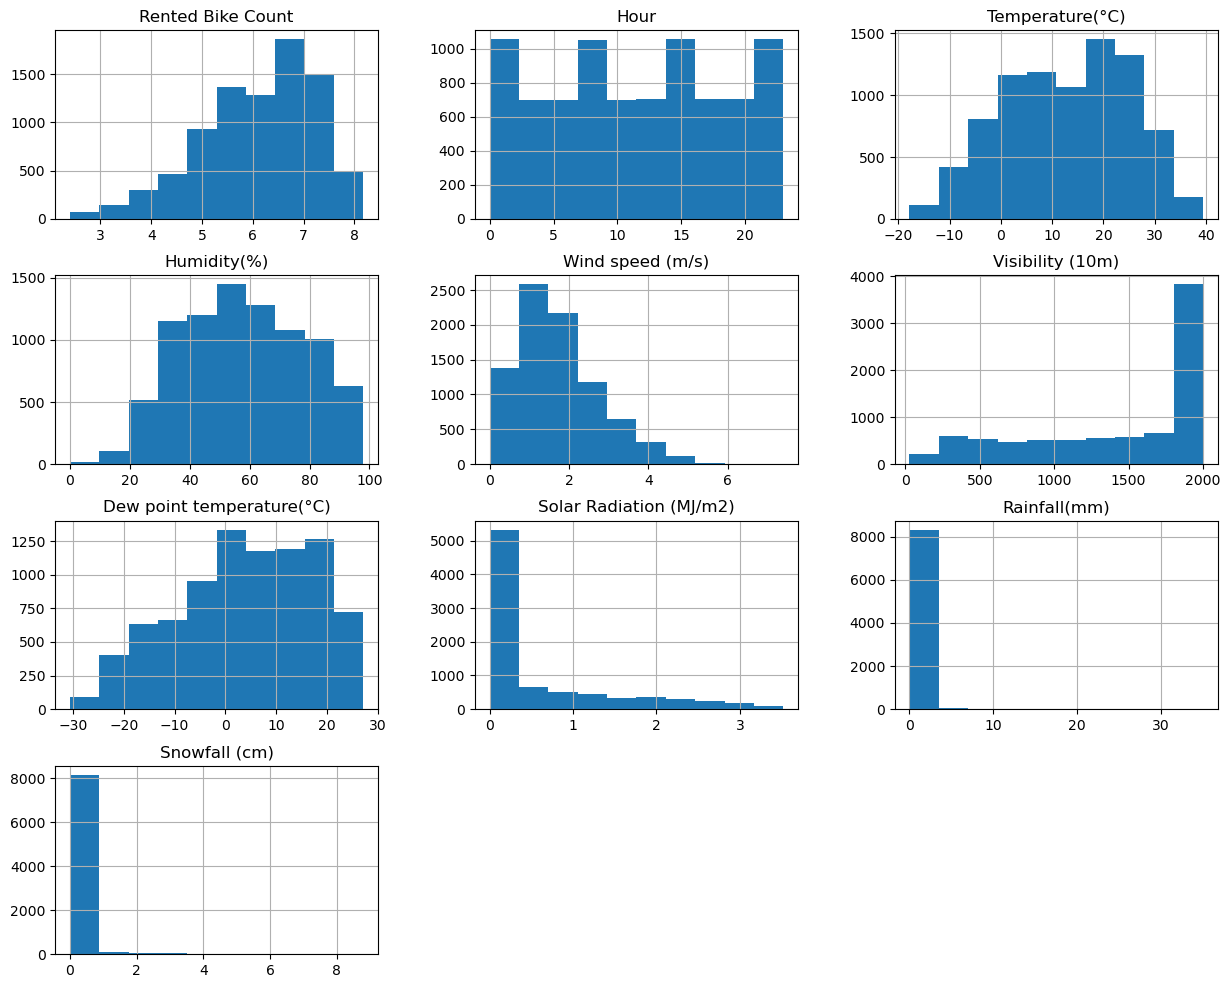

In [25]:
pre_b_df.hist(figsize=(15,12))

### 과정
- 앞선 날짜별 카운트를 확인했고 지워도 무방하다고 판단.
- OLS 적용하기전 범주형 데이터 먼저 제거후 OLS 확인

In [26]:
pre_b_df = pre_b_df.drop(labels=['Date','Seasons','Holiday','Functioning Day'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8421,6.911747,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8422,6.639876,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8423,6.543912,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8424,6.569481,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


### 상관관계 확인

In [27]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.575281
Dew point temperature(°C)    0.392263
Hour                         0.383875
Solar Radiation (MJ/m2)      0.355044
Visibility (10m)             0.235532
Wind speed (m/s)             0.107965
Snowfall (cm)               -0.195053
Rainfall(mm)                -0.234772
Humidity(%)                 -0.261091
Name: Rented Bike Count, dtype: float64

In [28]:
pre_b_df['Solar Radiation (MJ/m2)'].value_counts()

Solar Radiation (MJ/m2)
0.00    4127
0.01     123
0.02      78
0.03      65
0.06      61
        ... 
2.97       1
3.22       1
3.44       1
3.49       1
3.45       1
Name: count, Length: 345, dtype: int64

In [29]:
pre_b_df['Rainfall(mm)'].value_counts()

Rainfall(mm)
0.0     7933
0.5      112
1.0       64
1.5       53
0.1       44
2.0       28
0.2       20
2.5       19
3.5       17
0.4       16
4.0       13
3.0       13
0.3        9
5.5        8
6.5        5
5.0        5
4.5        5
6.0        4
9.5        3
0.8        3
9.0        3
0.9        3
1.6        3
13.5       2
7.0        2
8.0        2
1.1        2
13.0       2
18.5       2
8.5        1
21.5       1
6.4        1
9.1        1
12.0       1
24.0       1
1.2        1
7.3        1
29.5       1
1.3        1
15.5       1
4.9        1
18.0       1
21.0       1
2.4        1
14.5       1
16.0       1
10.5       1
5.4        1
11.5       1
12.5       1
10.0       1
19.0       1
35.0       1
1.9        1
17.0       1
3.7        1
1.4        1
3.3        1
0.7        1
1.8        1
Name: count, dtype: int64

In [30]:
pre_b_df['Snowfall (cm)'].value_counts()

Snowfall (cm)
0.0    7984
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
3.0       5
2.7       5
1.8       5
3.2       4
4.1       4
1.3       4
4.0       4
1.1       3
3.7       3
3.8       3
2.1       3
2.3       3
1.9       3
1.7       3
2.4       3
3.3       3
8.8       2
2.8       2
3.4       2
4.8       2
4.3       2
3.9       2
1.4       2
0.1       2
5.0       2
2.9       2
5.1       1
3.1       1
1.5       1
4.2       1
7.1       1
7.0       1
6.0       1
3.6       1
Name: count, dtype: int64

### OLS 적용
- 범주형 데이터는 제거하고 적용

In [31]:
pre_b_df.iloc[:, :8]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0
1,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0
2,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0
3,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0
4,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0
...,...,...,...,...,...,...,...,...
8421,6.911747,19,4.2,34,2.6,1894,-10.3,0.0
8422,6.639876,20,3.4,37,2.3,2000,-9.9,0.0
8423,6.543912,21,2.6,39,0.3,1968,-9.9,0.0
8424,6.569481,22,2.1,41,1.0,1859,-9.8,0.0


In [32]:
from statsmodels.api import OLS

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[: ,0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          5.262e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:02   Log-Likelihood:                         -10295.
No. Observations:                8426   AIC:                                  2.061e+04
Df Residuals:                    8417   BIC:                                  2.067e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [34]:
get_vif(features)

,vif_score,feature
0,4.419354,Hour
1,33.053644,Temperature(°C)
2,5.317440,Humidity(%)
3,4.814449,Wind speed (m/s)
4,9.098997,Visibility (10m)
5,17.234468,Dew point temperature(°C)
6,2.864566,Solar Radiation (MJ/m2)
7,1.074249,Rainfall(mm)
8,1.123967,Snowfall (cm)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

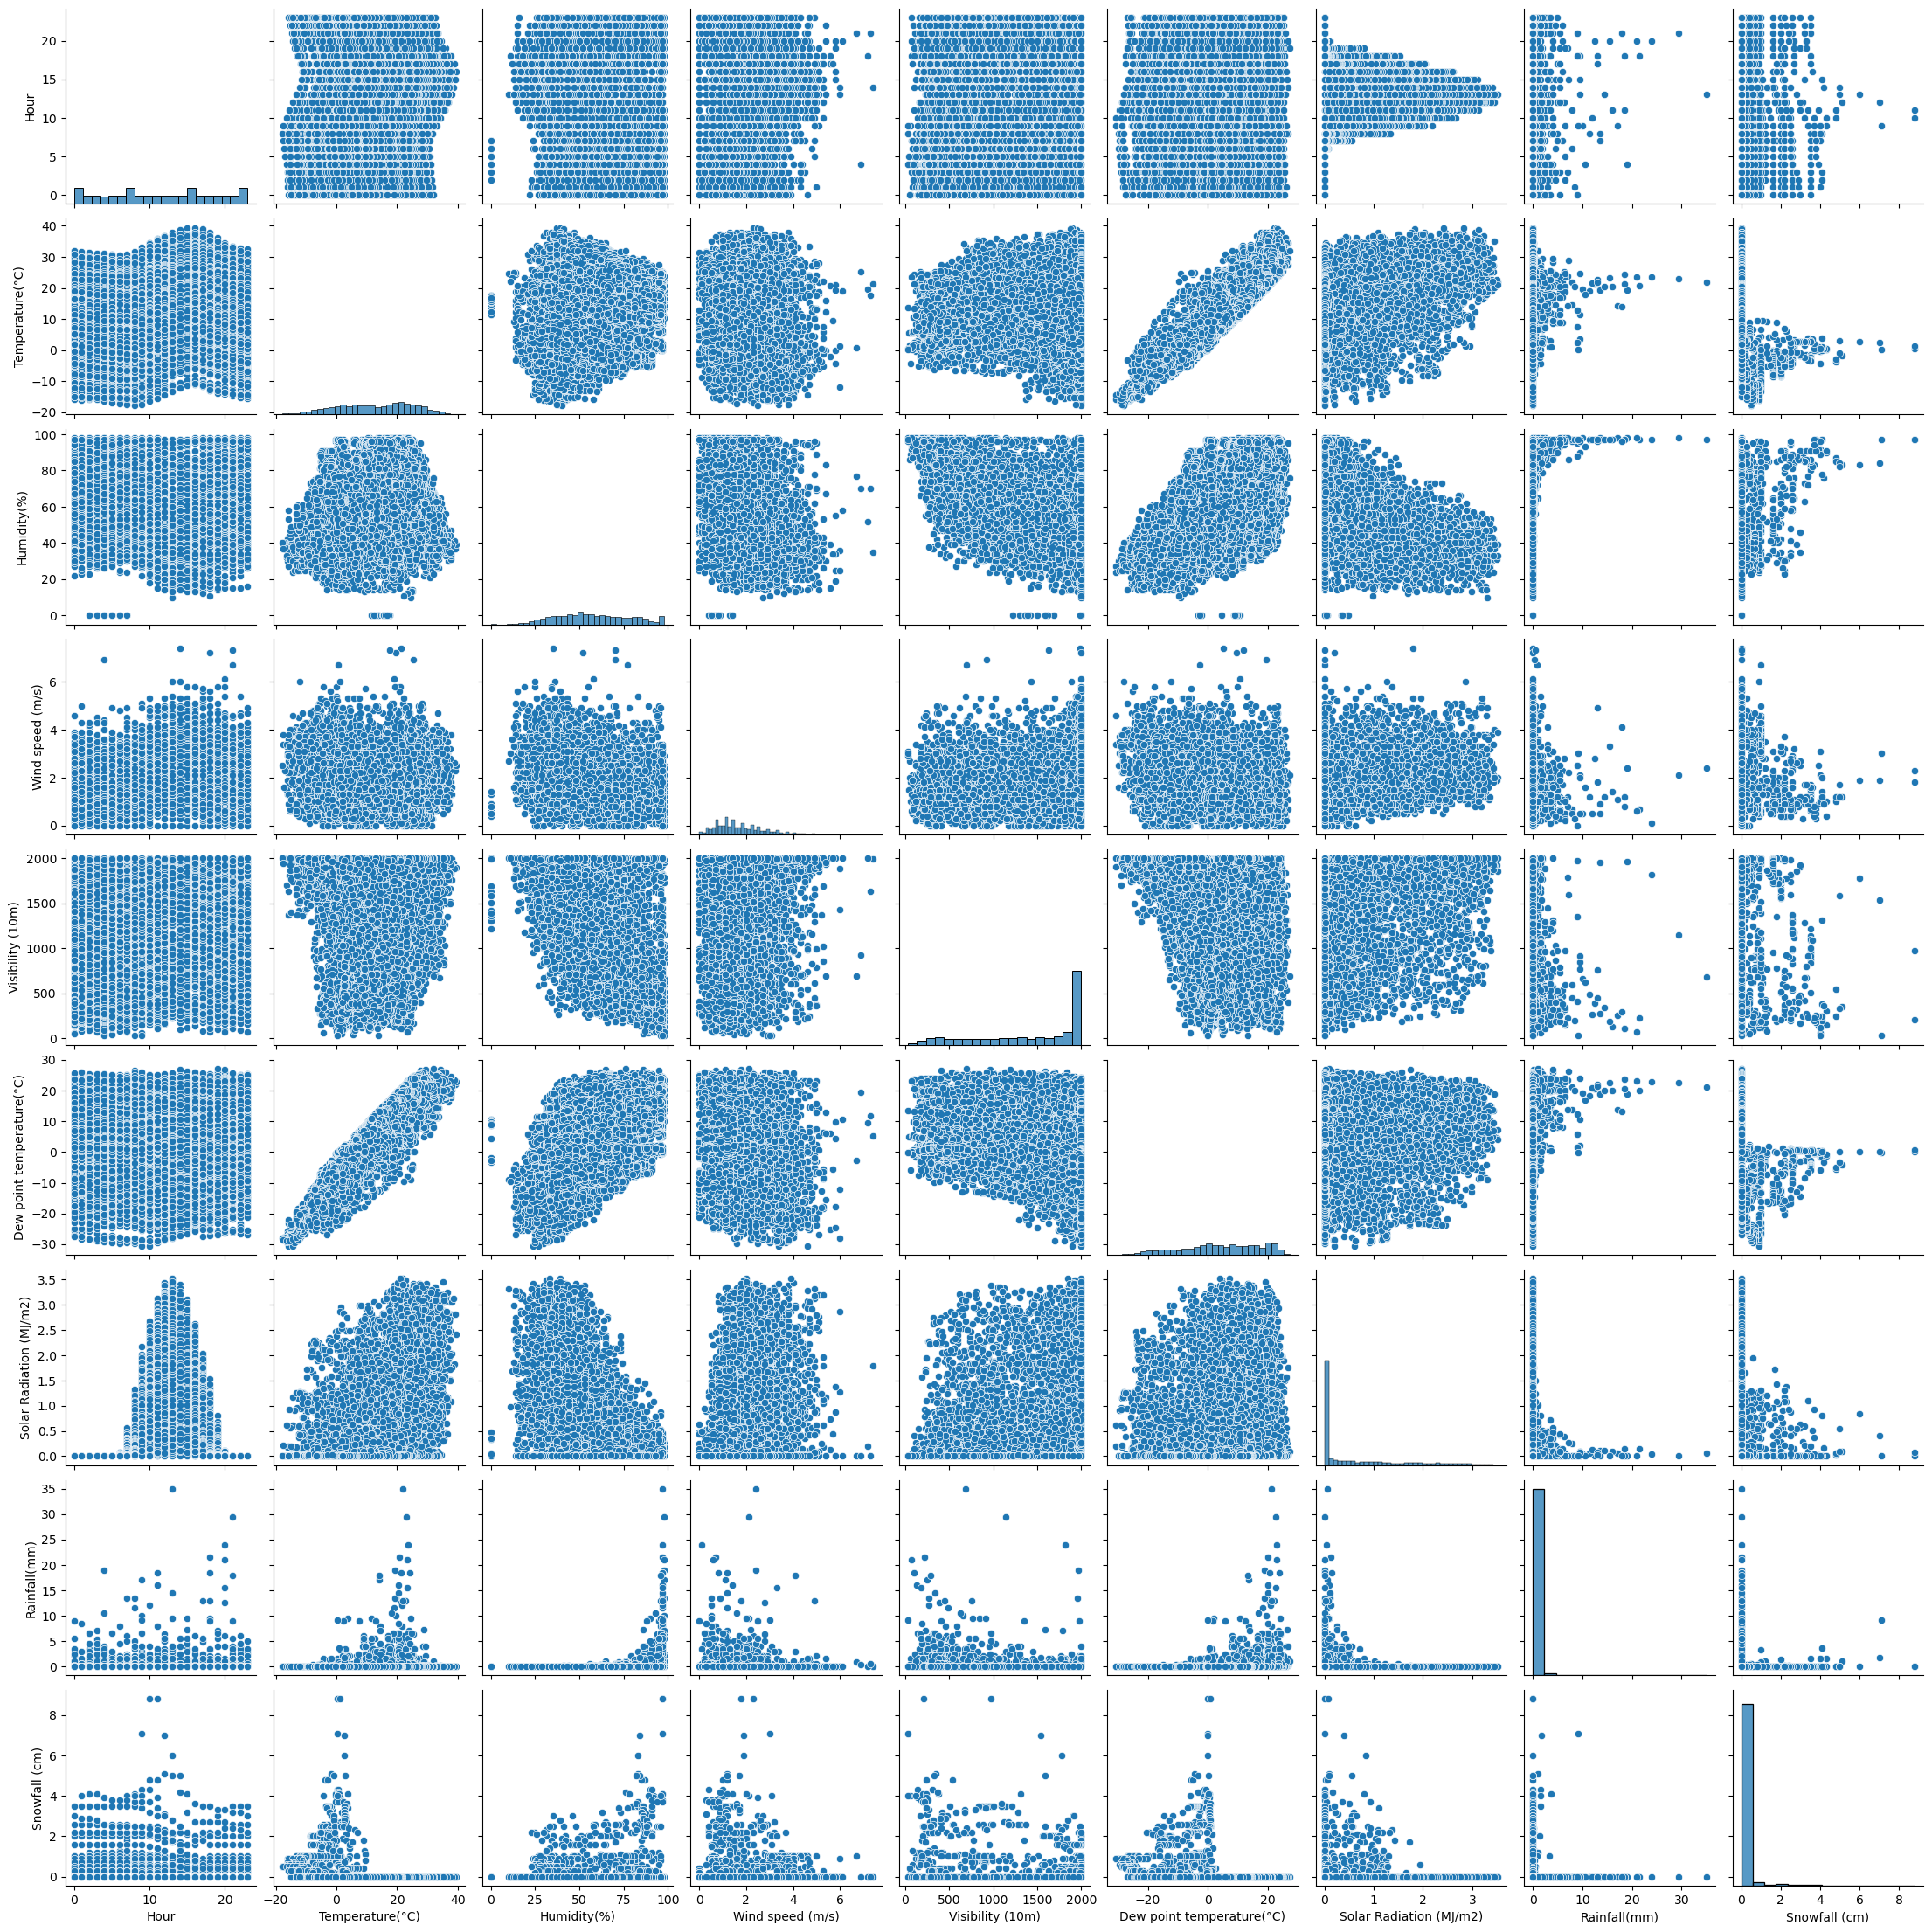

In [35]:
import seaborn as sns

sns.pairplot(features)
plt.show()

다중 공선성 제거
- Temperature(°C)
- Dew point temperature(°C)

In [36]:
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8421,6.911747,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8422,6.639876,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8423,6.543912,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8424,6.569481,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [37]:
pre_b_df1 = pre_b_df.drop(labels=['Temperature(°C)', 'Dew point temperature(°C)'], axis=1)
pre_b_df1

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,5.541264,0,37,2.2,2000,0.0,0.0,0.0
1,5.323010,1,38,0.8,2000,0.0,0.0,0.0
2,5.159055,2,39,1.0,2000,0.0,0.0,0.0
3,4.682131,3,40,0.9,2000,0.0,0.0,0.0
4,4.369448,4,36,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8421,6.911747,19,34,2.6,1894,0.0,0.0,0.0
8422,6.639876,20,37,2.3,2000,0.0,0.0,0.0
8423,6.543912,21,39,0.3,1968,0.0,0.0,0.0
8424,6.569481,22,41,1.0,1859,0.0,0.0,0.0


다시 확인

In [38]:
from statsmodels.api import OLS

features, targets = pre_b_df1.iloc[:, 1:], pre_b_df1.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          3.514e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:10   Log-Likelihood:                         -12988.
No. Observations:                8426   AIC:                                  2.599e+04
Df Residuals:                    8419   BIC:                                  2.604e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [39]:
get_vif(features)

,vif_score,feature
0,3.871990,Hour
1,3.607710,Humidity(%)
2,4.403779,Wind speed (m/s)
3,4.722318,Visibility (10m)
4,1.707909,Solar Radiation (MJ/m2)
5,1.071305,Rainfall(mm)
6,1.052616,Snowfall (cm)


다중 공산성 제거
- 상관관계 다시 확인

In [40]:
pre_b_df1.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Hour                       0.383875
Solar Radiation (MJ/m2)    0.355044
Visibility (10m)           0.235532
Wind speed (m/s)           0.107965
Snowfall (cm)             -0.195053
Rainfall(mm)              -0.234772
Humidity(%)               -0.261091
Name: Rented Bike Count, dtype: float64

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>],
       [<Axes: title={'center': 'Rainfall(mm)'}>,
        <Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >]],
      dtype=object)

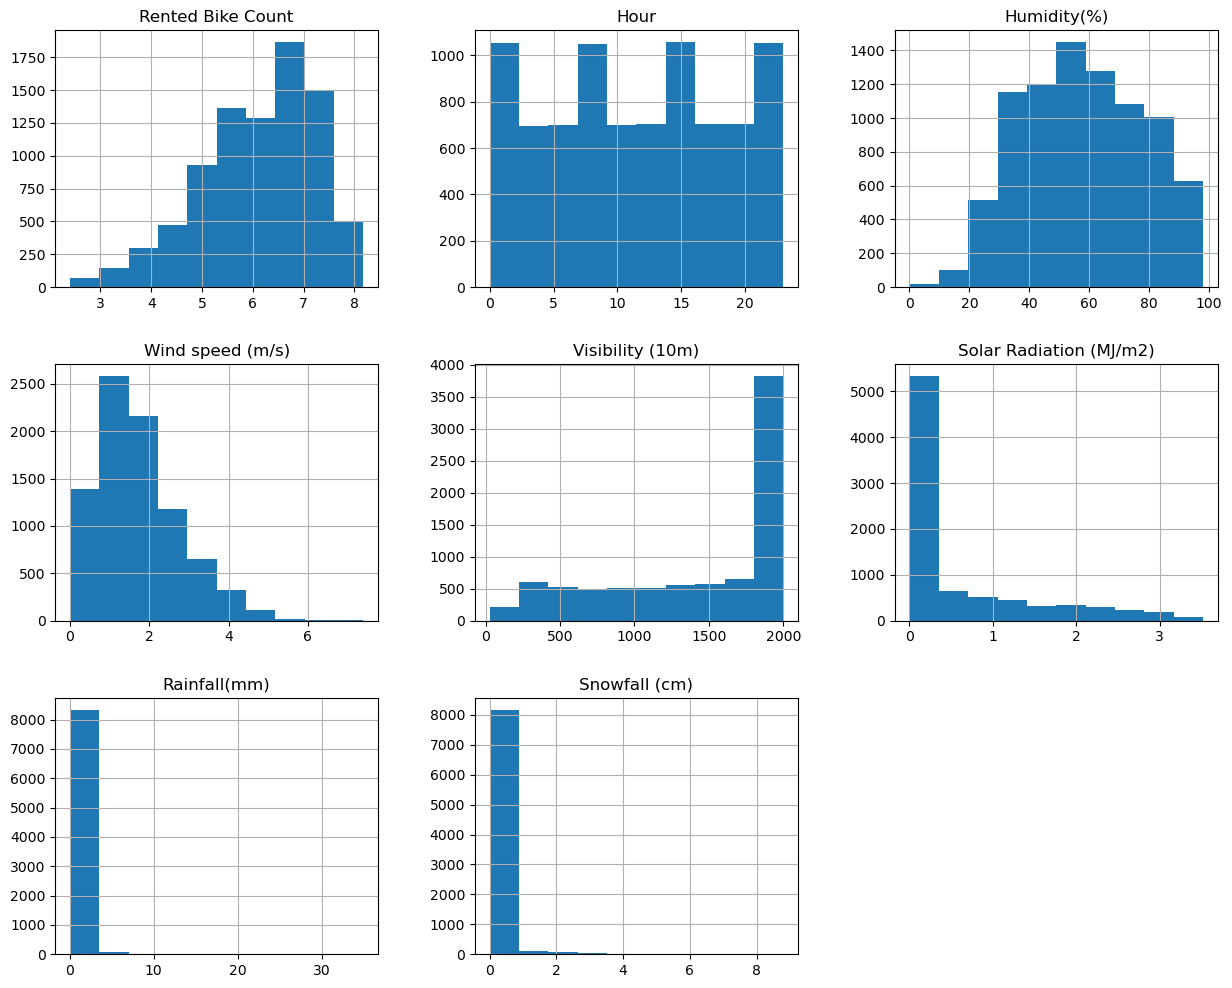

In [35]:
pre_b_df1.hist(figsize=(15,12))

In [41]:
pre_b_df = pre_b_df.drop(labels=['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Visibility (10m)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Snowfall (cm)
0,5.541264,0,-5.2,37,2.2,-17.6,0.0
1,5.323010,1,-5.5,38,0.8,-17.6,0.0
2,5.159055,2,-6.0,39,1.0,-17.7,0.0
3,4.682131,3,-6.2,40,0.9,-17.6,0.0
4,4.369448,4,-6.0,36,2.3,-18.6,0.0
...,...,...,...,...,...,...,...
8421,6.911747,19,4.2,34,2.6,-10.3,0.0
8422,6.639876,20,3.4,37,2.3,-9.9,0.0
8423,6.543912,21,2.6,39,0.3,-9.9,0.0
8424,6.569481,22,2.1,41,1.0,-9.8,0.0


In [45]:
pre_b_df = pre_b_df.drop(labels=['Wind speed (m/s)', 'Snowfall (cm)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Dew point temperature(°C)
0,5.541264,0,-5.2,37,-17.6
1,5.323010,1,-5.5,38,-17.6
2,5.159055,2,-6.0,39,-17.7
3,4.682131,3,-6.2,40,-17.6
4,4.369448,4,-6.0,36,-18.6
...,...,...,...,...,...
8421,6.911747,19,4.2,34,-10.3
8422,6.639876,20,3.4,37,-9.9
8423,6.543912,21,2.6,39,-9.9
8424,6.569481,22,2.1,41,-9.8


array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>, <Axes: >]],
      dtype=object)

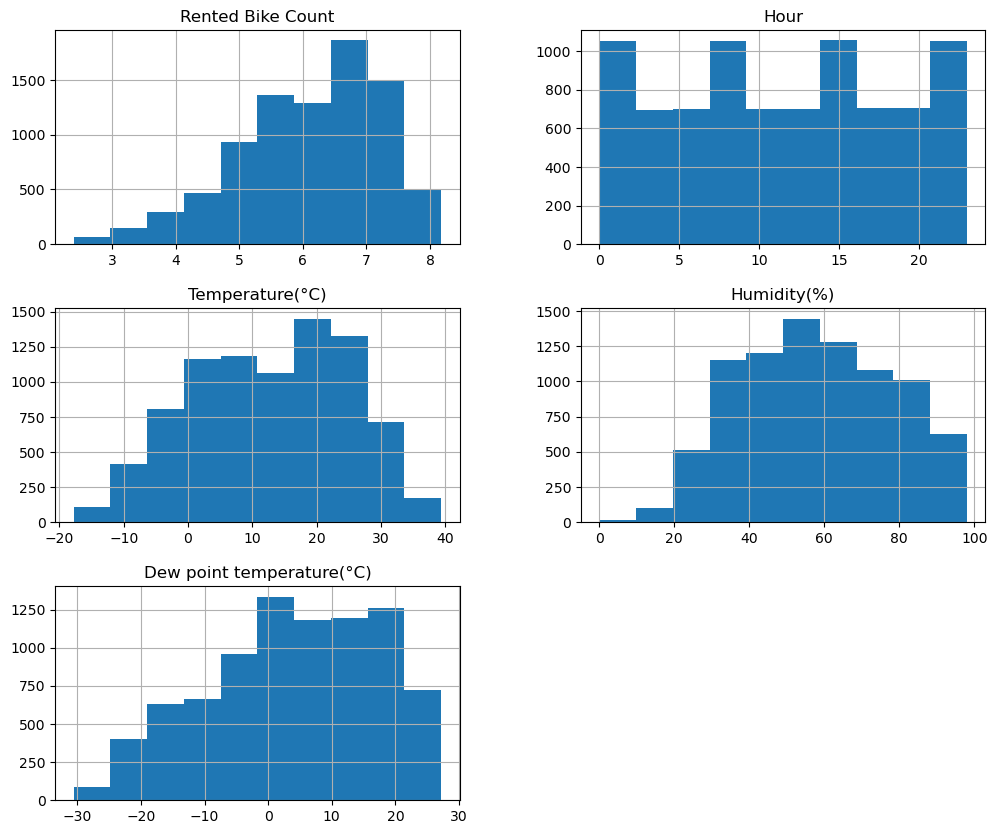

In [46]:
pre_b_df.hist(figsize=(12,10))

In [47]:
from statsmodels.api import OLS

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())


                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        16:58:54   Log-Likelihood:                         -10944.
No. Observations:                8426   AIC:                                  2.190e+04
Df Residuals:                    8422   BIC:                                  2.192e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [49]:
get_vif(features)

,vif_score,feature
0,4.097544,Hour
1,9.241849,Temperature(°C)
2,3.038507,Humidity(%)
3,5.260708,Dew point temperature(°C)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

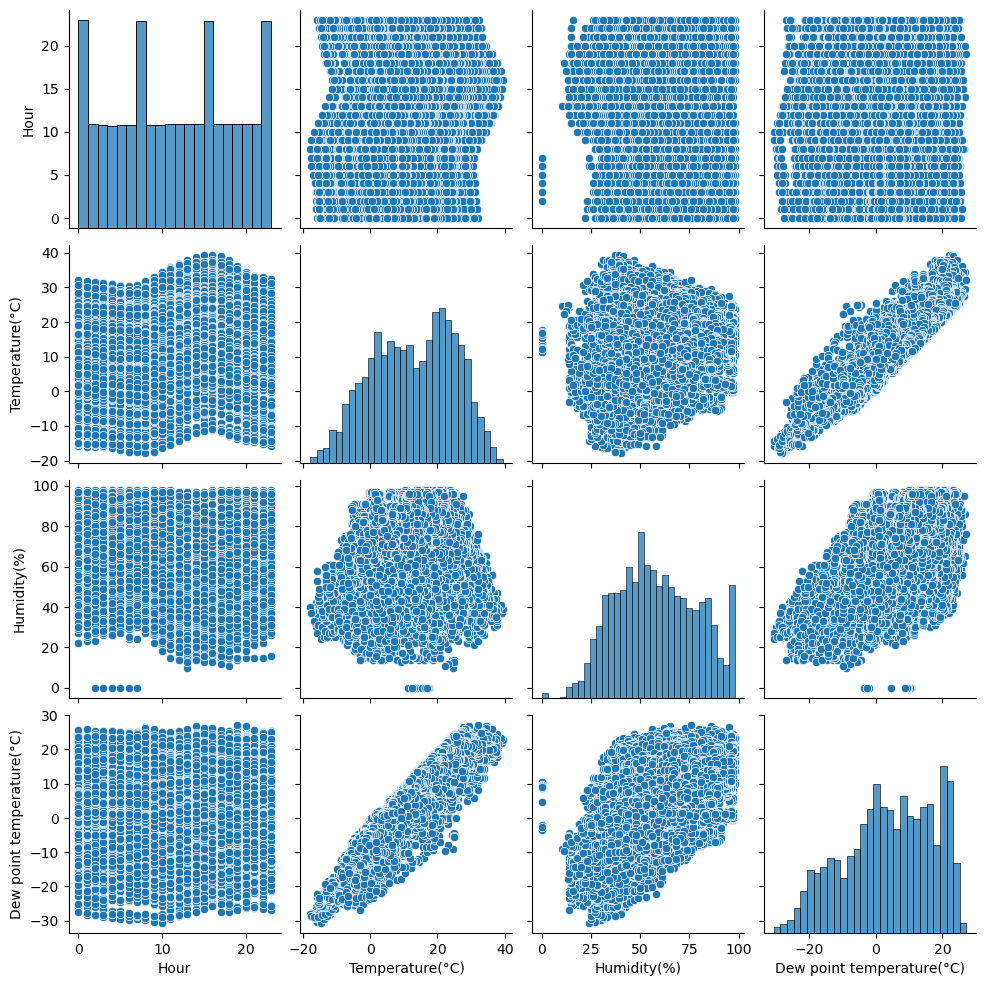

In [50]:
import seaborn as sns

sns.pairplot(features)
plt.show()

In [51]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.575281
Dew point temperature(°C)    0.392263
Hour                         0.383875
Humidity(%)                 -0.261091
Name: Rented Bike Count, dtype: float64

In [52]:
pre_b_df = pre_b_df.drop(labels=['Dew point temperature(°C)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%)
0,5.541264,0,-5.2,37
1,5.323010,1,-5.5,38
2,5.159055,2,-6.0,39
3,4.682131,3,-6.2,40
4,4.369448,4,-6.0,36
...,...,...,...,...
8421,6.911747,19,4.2,34
8422,6.639876,20,3.4,37
8423,6.543912,21,2.6,39
8424,6.569481,22,2.1,41


In [53]:
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

In [54]:
get_vif(features)

,vif_score,feature
0,2.599292,Hour
1,2.234852,Temperature(°C)
2,3.037354,Humidity(%)


In [55]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          3.361e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        16:59:29   Log-Likelihood:                         -16552.
No. Observations:                8426   AIC:                                  3.311e+04
Df Residuals:                    8423   BIC:                                  3.313e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [56]:
b_df.loc[:, ['Seasons', 'Holiday', 'Functioning Day']]

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [57]:
columns = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Seasons', 'Holiday', 'Rented Bike Count']

pre_b_df = b_df.iloc[pre_b_df.index].loc[:, columns].reset_index(drop=True)
pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,Winter,No Holiday,5.541264
1,1,-5.5,38,Winter,No Holiday,5.323010
2,2,-6.0,39,Winter,No Holiday,5.159055
3,3,-6.2,40,Winter,No Holiday,4.682131
4,4,-6.0,36,Winter,No Holiday,4.369448
...,...,...,...,...,...,...
8421,21,6.8,73,Autumn,No Holiday,6.811244
8422,22,6.2,72,Autumn,No Holiday,6.796824
8423,23,5.0,75,Autumn,No Holiday,6.533789
8424,0,4.2,76,Autumn,No Holiday,6.440947


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_b_df['Holiday'])
print(result)
print(label_encoder.classes_)
pre_b_df['Holiday'] = result

[1 1 1 ... 1 1 1]
['Holiday' 'No Holiday']


In [60]:
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,Winter,1,5.541264
1,1,-5.5,38,Winter,1,5.323010
2,2,-6.0,39,Winter,1,5.159055
3,3,-6.2,40,Winter,1,4.682131
4,4,-6.0,36,Winter,1,4.369448
...,...,...,...,...,...,...
8421,21,6.8,73,Autumn,1,6.811244
8422,22,6.2,72,Autumn,1,6.796824
8423,23,5.0,75,Autumn,1,6.533789
8424,0,4.2,76,Autumn,1,6.440947


In [61]:
pre_b_df.Seasons.value_counts()

Seasons
Spring    2208
Summer    2208
Winter    2160
Autumn    1850
Name: count, dtype: int64

In [62]:
def change_seasons(season):
    if season == 'Spring':
        return 0
    if season == 'Summer':
        return 1
    if season == 'Autumn':
        return 2
    return 3

In [63]:
pre_b_df['Seasons'] = pre_b_df['Seasons'].apply(change_seasons)
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,3,1,5.541264
1,1,-5.5,38,3,1,5.323010
2,2,-6.0,39,3,1,5.159055
3,3,-6.2,40,3,1,4.682131
4,4,-6.0,36,3,1,4.369448
...,...,...,...,...,...,...
8421,21,6.8,73,2,1,6.811244
8422,22,6.2,72,2,1,6.796824
8423,23,5.0,75,2,1,6.533789
8424,0,4.2,76,2,1,6.440947


In [64]:
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          2.121e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        17:00:22   Log-Likelihood:                         -16181.
No. Observations:                8426   AIC:                                  3.237e+04
Df Residuals:                    8421   BIC:                                  3.241e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [65]:
get_vif(features)

,vif_score,feature
0,3.632725,Hour
1,3.063064,Temperature(°C)
2,7.552441,Humidity(%)
3,3.134001,Seasons
4,10.525538,Holiday


In [66]:
get_vif(features.drop(labels=['Holiday'], axis=1))

,vif_score,feature
0,3.169002,Hour
1,2.900095,Temperature(°C)
2,4.464794,Humidity(%)
3,2.781680,Seasons


In [67]:
pre_b_df = pre_b_df.drop(labels=['Holiday'], axis=1)
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Rented Bike Count
0,0,-5.2,37,3,5.541264
1,1,-5.5,38,3,5.323010
2,2,-6.0,39,3,5.159055
3,3,-6.2,40,3,4.682131
4,4,-6.0,36,3,4.369448
...,...,...,...,...,...
8421,21,6.8,73,2,6.811244
8422,22,6.2,72,2,6.796824
8423,23,5.0,75,2,6.533789
8424,0,4.2,76,2,6.440947


array([[<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Seasons'}>],
       [<Axes: title={'center': 'Rented Bike Count'}>, <Axes: >]],
      dtype=object)

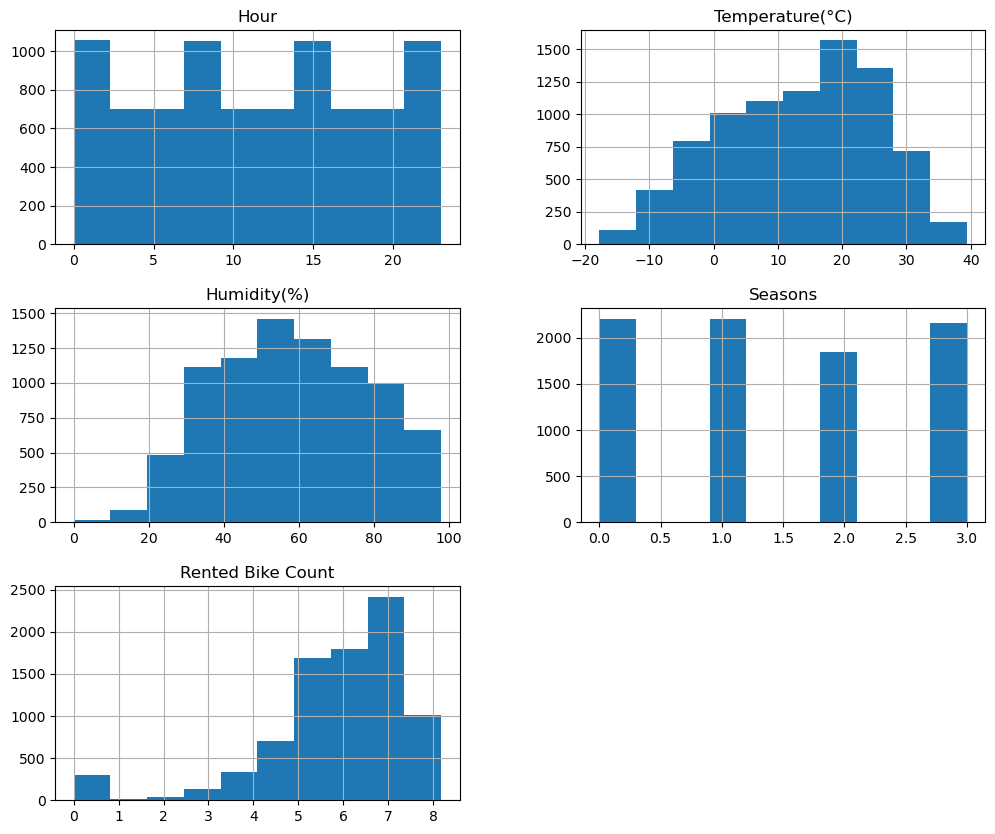

In [68]:
pre_b_df.hist(figsize=(12, 10))

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [71]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.0476, RMSE: 1.4309, MSLE: 0.1537, RMSLE: 0.3921, R2: 0.2082
